In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install statsmodels==0.12.0

     |████████████████████████████████| 9.5 MB 7.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [3]:
%cp /content/drive/MyDrive/CSVs/* ./

In [119]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.graphics.gofplots import qqplot

In [120]:
from pandas_datareader import data as pdr
from datetime import datetime

In [121]:
df = pd.read_csv('/content/Google_stock.csv')

In [122]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2018-12-31,1062.989990,1033.040039,1057.829956,1044.959961,1655500,1044.959961
1,2019-01-02,1060.790039,1025.280029,1027.199951,1054.680054,1593400,1054.680054
2,2019-01-03,1066.260010,1022.369995,1050.670044,1025.469971,2098000,1025.469971
3,2019-01-04,1080.000000,1036.859985,1042.560059,1078.069946,2301100,1078.069946
4,2019-01-07,1082.699951,1062.640015,1080.969971,1075.920044,2372300,1075.920044


In [123]:
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
248,2019-12-24,1352.010010,1344.170044,1350.209961,1344.430054,673400,1344.430054
249,2019-12-26,1363.199951,1345.510010,1346.550049,1362.469971,1183100,1362.469971
250,2019-12-27,1367.050049,1353.000000,1364.000000,1354.640015,1160600,1354.640015
251,2019-12-30,1357.000000,1337.839966,1356.810059,1339.709961,999700,1339.709961
252,2019-12-31,1340.660034,1332.130005,1335.790039,1339.390015,975700,1339.390015


#**Stock Return Analysis**

In [124]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [125]:
close = df['Close']
date_rng  =  pd.date_range(end='2019-12-31', periods=253, freq='B')

In [126]:
df=pd.DataFrame(close.values,columns=['Close'])
df['TimeIndex'] = pd.DataFrame(date_rng, columns=['B-Days'])

In [127]:
df

,Close,TimeIndex
0,1044.959961,2019-01-11
1,1054.680054,2019-01-14
2,1025.469971,2019-01-15
3,1078.069946,2019-01-16
4,1075.920044,2019-01-17
...,...,...
248,1344.430054,2019-12-25
249,1362.469971,2019-12-26
250,1354.640015,2019-12-27
251,1339.709961,2019-12-30


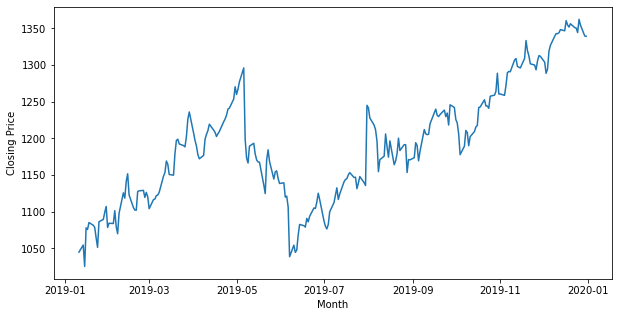

In [128]:
plt.figure(figsize=(10, 5))
plt.plot(df.TimeIndex, df.Close)
plt.ylabel('Closing Price')
plt.xlabel('Month')
plt.show()

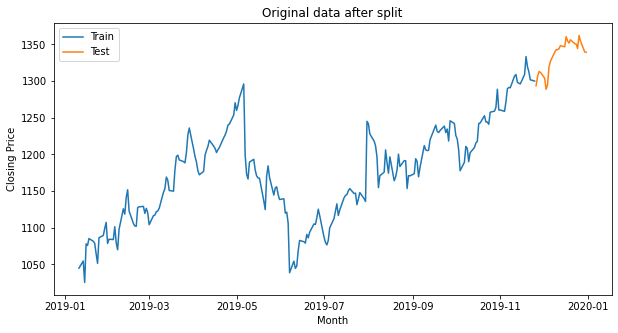

In [129]:
train = df[0:int(len(df)*0.9)] 
test= df[int(len(df)*0.9):]

plt.figure(figsize=(10, 5))
plt.plot(train.TimeIndex, train.Close, label = 'Train')
plt.plot(test.TimeIndex, test.Close,  label = 'Test')

plt.legend(loc = 'best')
plt.ylabel('Closing Price')
plt.xlabel('Month')
plt.title('Original data after split')
plt.show()

In [130]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [131]:
from sklearn.metrics import  mean_squared_error

In [132]:
# create class
model = SimpleExpSmoothing(np.asarray(train['Close']))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


For alpha = 0.00,  RMSE is 290.0900 


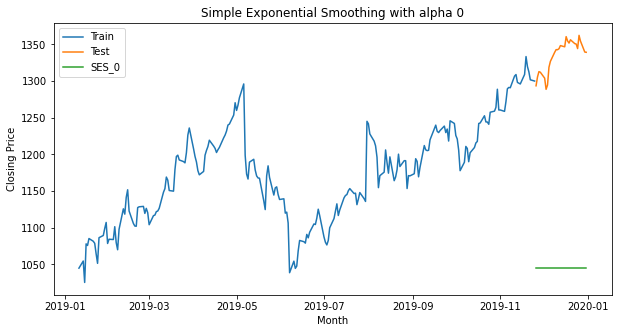

In [133]:
alpha_value = 0

pred_SES = test.copy() 

alpha_str =  "SES_" + str(alpha_value)
mode_fit_i  =  model.fit(smoothing_level = alpha_value, optimized=False)
pred_SES[alpha_str]  =  mode_fit_i.forecast(len(test['Close']))
rmse =  np.sqrt(mean_squared_error(test['Close'], pred_SES[alpha_str]))


print("For alpha = %1.2f,  RMSE is %3.4f " %(alpha_value, rmse))
plt.figure(figsize=(10,5))
plt.plot(train.TimeIndex, train['Close'], label ='Train')
plt.plot(test.TimeIndex, test['Close'], label  ='Test')
plt.plot(test.TimeIndex, pred_SES[alpha_str], label  = alpha_str)
plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
plt.ylabel('Closing Price')
plt.xlabel('Month')
plt.legend(loc='best') 
plt.show()

For alpha = 0.10,  RMSE is 46.6937 


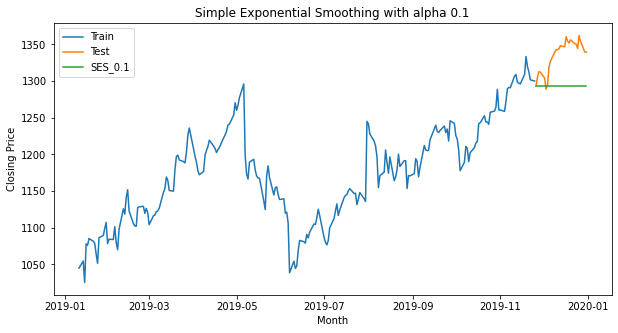

In [134]:
alpha_value = 0.1

pred_SES = test.copy() 

alpha_str =  "SES_" + str(alpha_value)
mode_fit_i  =  model.fit(smoothing_level = alpha_value, optimized=False)
pred_SES[alpha_str]  =  mode_fit_i.forecast(len(test['Close']))
rmse =  np.sqrt(mean_squared_error(test['Close'], pred_SES[alpha_str]))


print("For alpha = %1.2f,  RMSE is %3.4f " %(alpha_value, rmse))
plt.figure(figsize=(10,5))
plt.plot(train.TimeIndex, train['Close'], label ='Train')
plt.plot(test.TimeIndex, test['Close'], label  ='Test')
plt.plot(test.TimeIndex, pred_SES[alpha_str], label  = alpha_str)
plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
plt.ylabel('Closing Price')
plt.xlabel('Month')
plt.legend(loc='best') 
plt.show()

For alpha = 0.50,  RMSE is 37.0352 


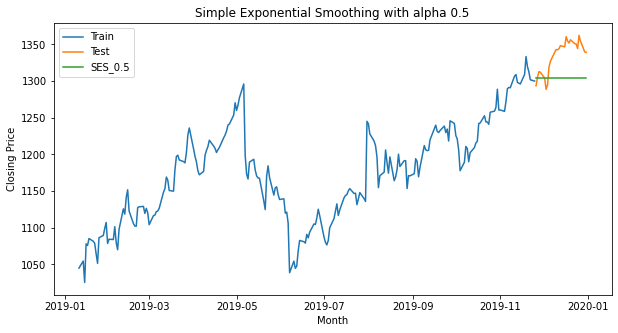

In [135]:
alpha_value = 0.5

pred_SES = test.copy() 

alpha_str =  "SES_" + str(alpha_value)
mode_fit_i  =  model.fit(smoothing_level = alpha_value, optimized=False)
pred_SES[alpha_str]  =  mode_fit_i.forecast(len(test['Close']))
rmse =  np.sqrt(mean_squared_error(test['Close'], pred_SES[alpha_str]))


print("For alpha = %1.2f,  RMSE is %3.4f " %(alpha_value, rmse))
plt.figure(figsize=(10,5))
plt.plot(train.TimeIndex, train['Close'], label ='Train')
plt.plot(test.TimeIndex, test['Close'], label  ='Test')
plt.plot(test.TimeIndex, pred_SES[alpha_str], label  = alpha_str)
plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
plt.ylabel('Closing Price')
plt.xlabel('Month')
plt.legend(loc='best') 
plt.show()

For alpha = 0.90,  RMSE is 40.3763 


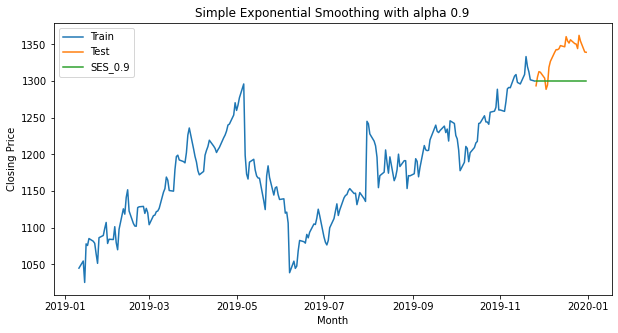

In [136]:
alpha_value = 0.9

pred_SES = test.copy() 

alpha_str =  "SES_" + str(alpha_value)
mode_fit_i  =  model.fit(smoothing_level = alpha_value, optimized=False)
pred_SES[alpha_str]  =  mode_fit_i.forecast(len(test['Close']))
rmse =  np.sqrt(mean_squared_error(test['Close'], pred_SES[alpha_str]))


print("For alpha = %1.2f,  RMSE is %3.4f " %(alpha_value, rmse))
plt.figure(figsize=(10,5))
plt.plot(train.TimeIndex, train['Close'], label ='Train')
plt.plot(test.TimeIndex, test['Close'], label  ='Test')
plt.plot(test.TimeIndex, pred_SES[alpha_str], label  = alpha_str)
plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
plt.ylabel('Closing Price')
plt.xlabel('Month')
plt.legend(loc='best') 
plt.show()

For alpha = 0.99,  RMSE is 40.6020 


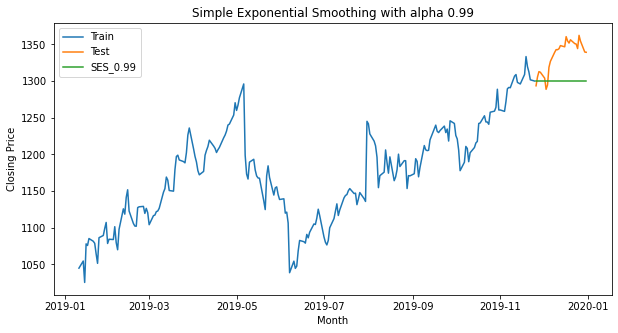

In [137]:
alpha_value = 0.99

pred_SES = test.copy() 

alpha_str =  "SES_" + str(alpha_value)
mode_fit_i  =  model.fit(smoothing_level = alpha_value, optimized=False)
pred_SES[alpha_str]  =  mode_fit_i.forecast(len(test['Close']))
rmse =  np.sqrt(mean_squared_error(test['Close'], pred_SES[alpha_str]))


print("For alpha = %1.2f,  RMSE is %3.4f " %(alpha_value, rmse))
plt.figure(figsize=(10,5))
plt.plot(train.TimeIndex, train['Close'], label ='Train')
plt.plot(test.TimeIndex, test['Close'], label  ='Test')
plt.plot(test.TimeIndex, pred_SES[alpha_str], label  = alpha_str)
plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
plt.ylabel('Closing Price')
plt.xlabel('Month')
plt.legend(loc='best') 
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,



Simple Exponential Smoothing 


Smoothing Level 0.9904
Initial Level 1045.0506

For alpha = 0.99,  RMSE is 40.6026 


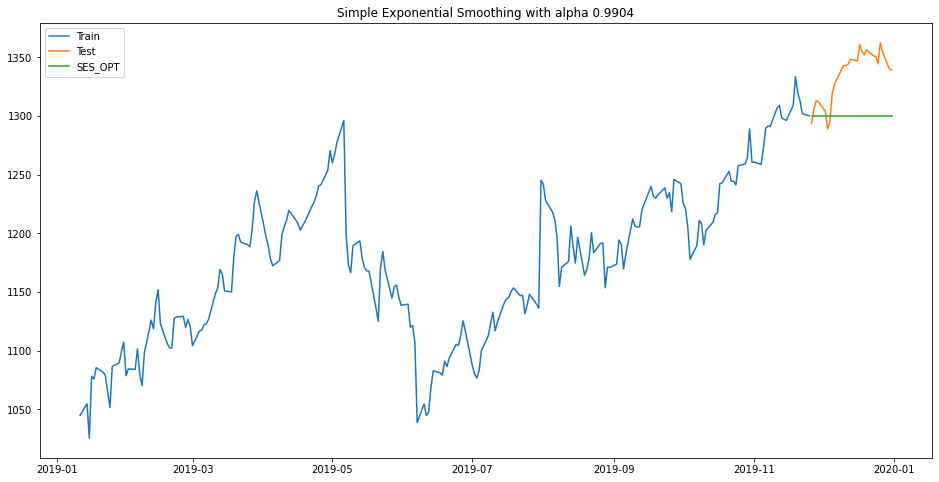

               227          228         229          230          231
Y_hat  1300.157520  1300.157520  1300.15752  1300.157520  1300.157520
Y      1293.670044  1305.640015  1313.00000  1312.130005  1304.089966


In [138]:
pred_opt   =  SimpleExpSmoothing(train['Close']).fit(optimized = True)
print('')
print('Simple Exponential Smoothing ')
print('')

print('')
print('Smoothing Level', np.round(pred_opt.params['smoothing_level'], 4))
print('Initial Level',   np.round(pred_opt.params['initial_level'], 4))
print('')

y_pred_opt           = pred_opt.forecast(steps = 26)
df_pred_opt          = pd.DataFrame({'Y_hat':y_pred_opt,'Y':test['Close'].values})

rmse_opt             =  np.sqrt(mean_squared_error(test['Close'], y_pred_opt))

alpha_value          = np.round(pred_opt.params['smoothing_level'], 4)

print("For alpha = %1.2f,  RMSE is %3.4f " %(alpha_value, rmse_opt))

plt.figure(figsize=(16,8))
plt.plot(train.TimeIndex, train['Close'], label = 'Train')
plt.plot(test.TimeIndex, test['Close'],  label = 'Test')
plt.plot(test.TimeIndex, y_pred_opt,           label = 'SES_OPT')
plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
plt.legend(loc='best') 
plt.show()

print(df_pred_opt.head().T)

# **Holt’s Method**

In [139]:
from   statsmodels.tsa.holtwinters import  Holt
model_holt = Holt(np.asarray(train['Close']))

model_fit = model_holt.fit()

print('')
print('==Holt model Exponential Smoothing Parameters ==')
print('')
alpha_value = np.round(model_fit.params['smoothing_level'], 4)
print('Smoothing Level', alpha_value)
print('Initial Level',   np.round(model_fit.params['initial_level'], 4))
print('')


==Holt model Exponential Smoothing Parameters ==

Smoothing Level 0.9955
Initial Level 1042.3405



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


In [140]:
Pred_Holt = test.copy()

Pred_Holt['Opt'] = model_fit.forecast(len(test['Close']))

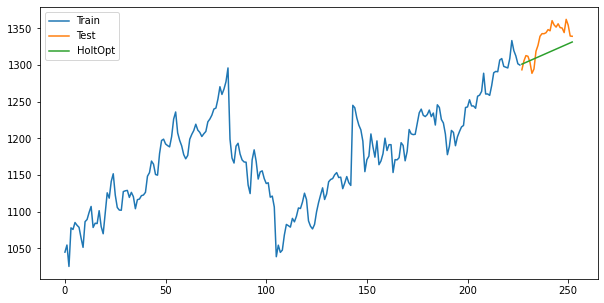

In [141]:
plt.figure(figsize=(10,5))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(Pred_Holt['Opt'], label='HoltOpt')
plt.legend(loc='best')
plt.show()

In [142]:
df_pred_opt =  pd.DataFrame({'Y_hat':Pred_Holt['Opt'] ,'Y':test['Close'].values})
rmse_opt =  np.sqrt(mean_squared_error(df_pred_opt.Y, df_pred_opt.Y_hat))

print("For alpha = %1.2f,  RMSE is %3.4f " %(alpha_value, rmse_opt))

For alpha = 1.00,  RMSE is 23.7160 


# **Holt-Winters’ Method**

In [143]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

pred1 = ExponentialSmoothing(np.asarray(train['Close']), trend='additive', damped_trend=False, seasonal='additive',
                                  seasonal_periods = 74).fit()
alpha_value = np.round(pred1.params['smoothing_level'], 4)
### Forecast for next 16 months

y_pred1 =  pred1.forecast(steps = 26)
df_pred1 = pd.DataFrame({'Y_hat':y_pred1,'Y':test['Close']})

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


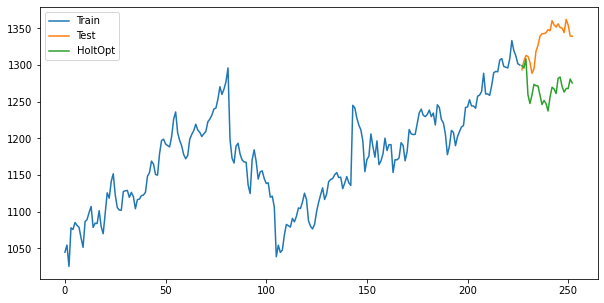

In [144]:
plt.figure(figsize=(10,5))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(df_pred1.Y_hat, label='HoltOpt')
plt.legend(loc='best')
plt.show()

In [145]:
rmse =  np.sqrt(mean_squared_error(df_pred1.Y, df_pred1.Y_hat))

print("For alpha = %1.2f,  RMSE is %3.4f " %(alpha_value, rmse))

For alpha = 1.00,  RMSE is 72.7355 
